# DNN: analysis with Keras of 2D data

In [2]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout

import matplotlib as mpl
mpl.rc('image', cmap='copper')
import matplotlib.pyplot as plt
# default font
plt.rcParams['font.size'] = 15

%run nonlinear_function.py

# training data
perc_train = 0.8

2024-02-27 15:54:21.463126: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-02-27 15:54:21.648501: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-02-27 15:54:23.245260: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


2
[-31.60811883 -29.54397214] 0.0
[6.77250291 9.5544703 ] 1.0
[46.45145197 15.31770969] 1.0
[24.89066375 15.35698709] 0.0
[24.77148093 46.13067361] 1.0
[-49.16117021 -39.35556233] 0.0
[-20.12962862  15.64111831] 1.0
[30.98125525 37.21759137] 1.0
[46.46475974 22.36853469] 1.0
[14.24753279 21.74536208] 0.0
data: 2000
train: 1600


<function matplotlib.pyplot.show(close=None, block=None)>

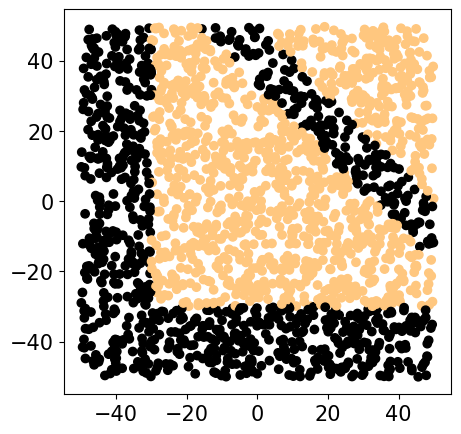

In [3]:
# Keras works with numpy arrays: just use them from the start
TYPE=1
x = np.loadtxt(filename("data",TYPE), delimiter=' ')
y = np.loadtxt(filename("labels",TYPE), delimiter=' ')
N = len(x)

# dim. of a sample
L = len(x[0])
print(L)

for i in range(10):
    print(x[i],y[i])

N_train = int(perc_train * N)
print(f'data: {N}\ntrain: {N_train}')

plt.figure(figsize = (5,5))
plt.scatter(x[:,0],x[:,1],c=y)
plt.show

### Split training and test data

In [4]:
(x_train, y_train) = (x[0:N_train],y[0:N_train])
(x_valid, y_valid) = (x[N_train:],y[N_train:])
print("Train:",len(x_train),"\t Validation:",len(x_valid))

Train: 1600 	 Validation: 400


### Rescale input data

In [5]:
def Rescale(x):
    #return (x-x.mean())/np.sqrt(x.var())
    return x/50

x_train = Rescale(x_train)
x_valid = Rescale(x_valid)

### Define the model with Keras / Tensorflow

In [6]:
# reproducibility (?)
np.random.seed(12345)
import tensorflow.random as tf_r
tf_r.set_seed(12345)

CASE=1

if CASE==1:
    model = Sequential()
    model.add(Dense(L,input_shape=(L,),activation='relu'))
    model.add(Dense(20,activation='relu'))
    model.add(Dense(20,activation='relu'))
    model.add(Dense(20,activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(1,activation='sigmoid'))
    nepoch=400
# as case 1 but one layer shorter
if CASE==2:
    model = Sequential()
    model.add(Dense(L,input_shape=(L,),activation='relu'))
    model.add(Dense(20,activation='relu'))
    model.add(Dense(20,activation='relu'))
    model.add(Dropout(0.01))
    model.add(Dense(1,activation='sigmoid'))
    nepoch=400
#deeper
if CASE==3:
    model = Sequential()
    model.add(Dense(L,input_shape=(L,),activation='relu'))
    model.add(Dense(10,activation='relu'))
    model.add(Dense(10,activation='relu'))
    model.add(Dense(10,activation='relu'))
    model.add(Dense(10,activation='relu'))
    model.add(Dense(10,activation='relu'))
    model.add(Dense(10,activation='relu'))
    model.add(Dense(1,activation='sigmoid'))
    nepoch=400
    
if CASE==10:
    model = Sequential()
    model.add(Dense(L,input_shape=(L,),activation='sigmoid'))
    model.add(Dense(6,activation='sigmoid'))
    model.add(Dense(2,activation='sigmoid'))
    model.add(Dense(1,activation='sigmoid'))
    nepoch=400
    
if CASE==20:
    model = Sequential()
    model.add(Dense(L,input_shape=(L,),activation='linear'))
    model.add(Dense(5,activation='tanh'))
    model.add(Dense(1,activation='sigmoid'))
    nepoch=400
print(model.summary())

/home/pietromalagoli/anaconda3/envs/lcpB/lib/python3.12/site-packages/keras/src/layers/core/dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2024-02-27 15:54:25.603703: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-02-27 15:54:25.604066: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2251] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 2)              │             6 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 20)             │            60 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 20)             │           420 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 20)             │           420 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 20)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            21 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 927 (3.62 KB)

 Trainable params: 927 (3.62 KB)

 Non-trainable params: 0 (0.00 B)

None


### Optimization method and cost function

In [13]:
model.compile(loss='binary_crossentropy',
              optimizer='RMSprop',
              #optimizer='adam',
              metrics=['accuracy'])

### Training

In [14]:
fit = model.fit(x_train, y_train,
               epochs = nepoch, batch_size = 50,
               validation_data=(x_valid,y_valid),
               verbose=2) ## when submitting the jupyter, do not set verbose

Epoch 1/400


32/32 - 2s - 55ms/step - accuracy: 0.9350 - loss: 0.1383 - val_accuracy: 0.9275 - val_loss: 0.1799
Epoch 2/400
32/32 - 0s - 6ms/step - accuracy: 0.9356 - loss: 0.1328 - val_accuracy: 0.9350 - val_loss: 0.1593
Epoch 3/400
32/32 - 0s - 5ms/step - accuracy: 0.9369 - loss: 0.1279 - val_accuracy: 0.9275 - val_loss: 0.1560
Epoch 4/400
32/32 - 0s - 4ms/step - accuracy: 0.9381 - loss: 0.1284 - val_accuracy: 0.9300 - val_loss: 0.1691
Epoch 5/400
32/32 - 0s - 4ms/step - accuracy: 0.9425 - loss: 0.1307 - val_accuracy: 0.9300 - val_loss: 0.1644
Epoch 6/400
32/32 - 0s - 4ms/step - accuracy: 0.9375 - loss: 0.1274 - val_accuracy: 0.9325 - val_loss: 0.1541
Epoch 7/400
32/32 - 0s - 4ms/step - accuracy: 0.9356 - loss: 0.1300 - val_accuracy: 0.9275 - val_loss: 0.1534
Epoch 8/400
32/32 - 0s - 7ms/step - accuracy: 0.9444 - loss: 0.1287 - val_accuracy: 0.9250 - val_loss: 0.1618
Epoch 9/400
32/32 - 0s - 7ms/step - accuracy: 0.9425 - loss: 0.1322 - val_accuracy: 0.9350 - val_loss: 0.1732
Epoch 10/400
32/32 - 

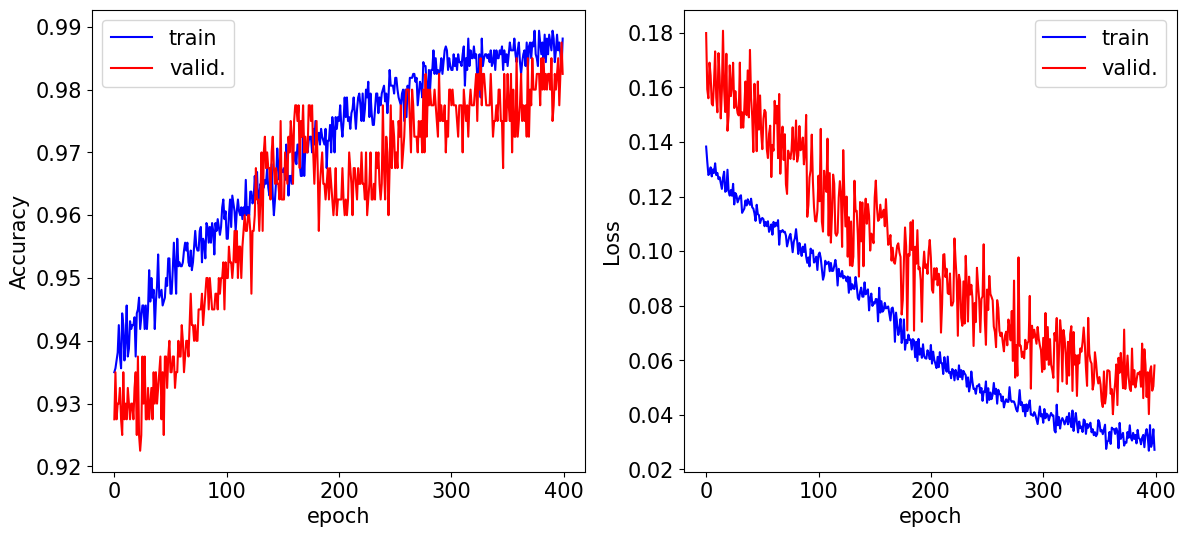

In [15]:
fig,AX=plt.subplots(1,2,figsize=(14,6.))
ax=AX[0]
ax.plot(fit.history['accuracy'],label="train",c="b")
ax.plot(fit.history['val_accuracy'],label="valid.",c="r")
ax.set_xlabel('epoch')
ax.set_ylabel("Accuracy")
ax.legend()
ax=AX[1]
ax.plot(fit.history['loss'],label="train",c="b")
ax.plot(fit.history['val_loss'],label="valid.",c="r")
ax.set_xlabel('epoch')
ax.set_ylabel("Loss")
ax.legend()

In [16]:
dX = 2
X1 = np.arange(-50,50+dX, dX)
LG = len(X1)
grid = np.zeros((LG*LG,2))
k=0
for i in range(LG):
    for j in range(LG):
        grid[k,:]=(X1[j],X1[i])
        k=k+1
print(len(X1),len(grid))
print(grid[-1])

# RESCALE

grid_r = grid/50

pred = model.predict(grid_r)

51 2601
[50. 50.]
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


<function matplotlib.pyplot.show(close=None, block=None)>

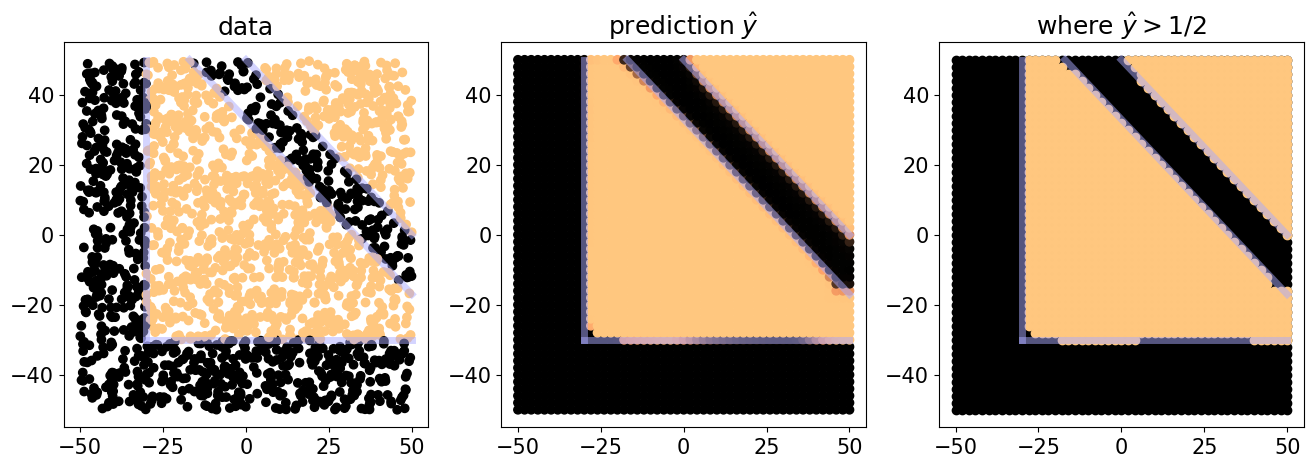

In [17]:
def boundaries():  
    x1=-30
    y1=-30
    c="#AAAAFF"
    a=0.5
    lw=5
    ax.plot((50,-17),(-17,50),c=c,alpha=a,lw=lw)
    ax.plot((50,0),(0,50),c=c,alpha=a,lw=lw)
    ax.plot((x1,50),(y1,y1),c=c,alpha=a,lw=lw)
    ax.plot((x1,x1),(y1,50),c=c,alpha=a,lw=lw)
fig,AX=plt.subplots(1,3,figsize=(16,5.))
ax=AX[0]
ax.scatter(x[:,0],x[:,1],c=y)
if TYPE==1: boundaries()
ax.set_title("data")
ax=AX[1]
ax.scatter(grid[:,0],grid[:,1],c=pred)
if TYPE==1: boundaries()
ax.set_title("prediction $\\hat y$")
ax=AX[2]
W1=np.where(pred>0.5)[0] 
ax.scatter(grid[:,0],grid[:,1],c="#000000")
ax.scatter(grid[W1,0],grid[W1,1],c="#ffc77f")
if TYPE==1: boundaries()
ax.set_title("where $\\hat y > 1/2$")
plt.show
plt.show

In [18]:
TYPE

1